In [2]:
from numpy.testing import assert_almost_equal

# Quiz 1: Machine Learning and the k-Nearest Neighbor Algorithm [15 pts]

## Problem 1 [1 pt]

In your own words, define machine learning. [1 pt]

Machine Learning is a type of AI that is used for predicting variables by learning information
from data. 

## Problem 2 [2 pts]

What does overfitting mean? [1 pt]

Overfitting means that your model is memorizing the actual data that is used to train it. If new data points are introduced it will most likely not have a high accuracy since it is not generalized.

How can you reduce overfitting in kNN models? [1 pt]

Overfitting can be reduced by adjusting the n_neighbor hyperparameter until you get the optimal value. if it is too high it will result in an underfit. 

## Problem 3 [2 pts]

You are predicting wether a creditor will: pay on time (happens 60% of the time); pay late (30%); or default (10%).

What is the *Proportion Chance Criterion (PCC)* of a random classifier? (Write your solution and answer in Markdown/LaTeX format) [2 pts]

YOUR ANSWER HERE

\begin{equation}
\mathbf{P}_{CC}= (0.6)^2 + (0.3)^2 + (0.1)^2  = 0.46
\end{equation}



## Problem 4 [10 pts]

You are given a dataset `starbucks_data.csv` that is composed of seven quantities that aims to forecast one's propensity to buy a Starbucks coffee daily.

The attributes of the dataset are as follows:

1. `allowanceDaily` - Daily allowance in PhP
2. `sex` - `0` for male, `1` for female
3. `proximity` - distance of closest encounter in daily routine to Starbucks
4. `iq` - IQ level based on standardized online test at IQtest.com
5. `school` - `1` for UP Diliman, `2` for Miriam College, `3` for ADMU, `4` for others
6. `age` - actual age in years
7. `dayOfTheWeek` - day of the week, Monday is `1`, Tuesday is `2`, ..., Sunday is `7`
8. `chanceDaily` - chance to buy a Starbucks product per day

*Source: anonymized data*

### Task 1 [4 pts]

Implement a kNN model that predicts the chance of a person to buy a Starbucks product daily using the other given features. Use $R^2$ as performance metric on the test set over `10` trials using an `80-20` train-test split.

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsRegressor
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('starbucks_data.csv')
display(data.shape)
data


(79, 8)

,allowanceDaily,sex,proximity,iq,school,age,dayOfTheWeek,chanceDaily
0,157,1,54,135,3,17,1,25
1,94,1,196,143,2,23,2,18
2,363,1,11,106,4,19,6,21
3,273,1,72,131,1,16,1,19
4,152,1,7,131,3,18,4,17
...,...,...,...,...,...,...,...,...
74,959,0,179,140,2,17,5,93
75,889,1,29,123,3,17,1,94
76,826,1,154,116,3,21,3,96
77,1004,1,166,151,3,20,1,94


In [7]:
df_features = data.drop('chanceDaily', axis=1)
df_features

,allowanceDaily,sex,proximity,iq,school,age,dayOfTheWeek
0,157,1,54,135,3,17,1
1,94,1,196,143,2,23,2
2,363,1,11,106,4,19,6
3,273,1,72,131,1,16,1
4,152,1,7,131,3,18,4
...,...,...,...,...,...,...,...
74,959,0,179,140,2,17,5
75,889,1,29,123,3,17,1
76,826,1,154,116,3,21,3
77,1004,1,166,151,3,20,1


In [31]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,11,1):
    X_train, X_test, y_train, y_test = train_test_split(df_features, data['chanceDaily'], test_size=0.2, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, len(X_train)-1) 

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
        reg.fit(X_train, y_train) 
        training_accuracy.append(reg.score(X_train, y_train)) 
        test_accuracy.append(reg.score(X_test, y_test)) 
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

In [35]:
optimal_k = all_test.mean(axis=1).idxmax()
test_score = all_test.mean(axis=1)[optimal_k]

print(f'optimal_k: {optimal_k+1}\ntest_score = {test_score}')

optimal_k: 13
test_score = 0.7158867532342665


### Task 2 [2 pts]

Plot the train and test $R^2$ versus `n_neighbors` (up to `N-1` where `N` is the number of rows in the training set)

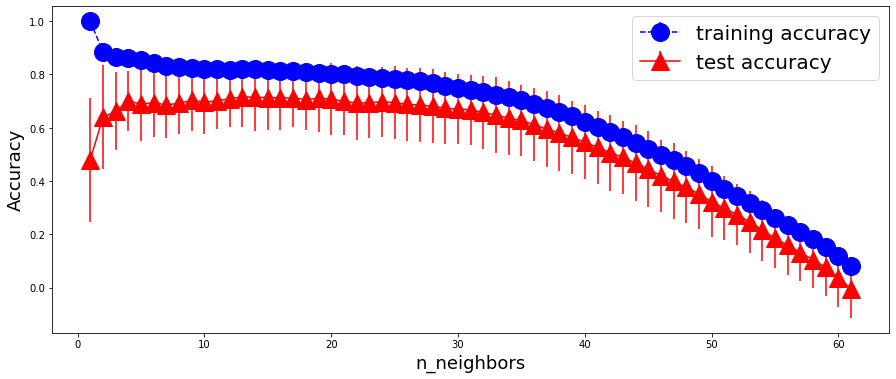

In [34]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

### Task 3 [2 pts]

Choose the best value of `n_neighbors` and justify


the best value of n_neighbors is k = 13. If you get the index of the highest mean test score from the trials, the value is k=13

In [36]:
optimal_k = all_test.mean(axis=1).idxmax()
test_score = all_test.mean(axis=1)[optimal_k]

print(f'optimal_k: {optimal_k+1}\ntest_score = {test_score}')

optimal_k: 13
test_score = 0.7158867532342665


### Task 4 [2 pts]

Plot the `predicted` versus `actual` for a sample test set for the chosen best `n_neighbors` setting

0.7465812623850872


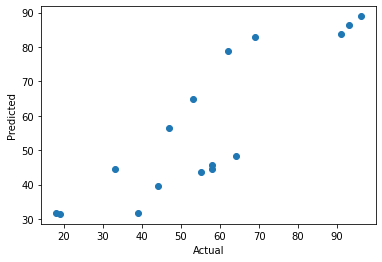

In [41]:
from sklearn.metrics import r2_score

reg = KNeighborsRegressor(n_neighbors=13)
X_train, X_test, y_train, y_test = train_test_split(df_features, data['chanceDaily'], test_size=0.2, random_state=8)
reg.fit(X_train, y_train)

plt.plot( y_test, reg.predict(X_test), 'o')

plt.xlabel("Actual")
plt.ylabel("Predicted")

print(r2_score(y_test, reg.predict(X_test)))

### Bonus [1 pt]

What procedures can you do (on the dataset or the model) to improve accuracy?




Might want to one hot encode the school variable since it is categorical in nature and not ordinal.
